In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [6]:
# path of cat and dog you can change thsi path according to your dataset path 
cat_director_path = 'dog_cat/train/cats'
dog_director_path = 'dog_cat/train/dogs'

In [18]:
len(os.listdir(cat_director_path)),len(os.listdir(dog_director_path))

(10000, 10000)

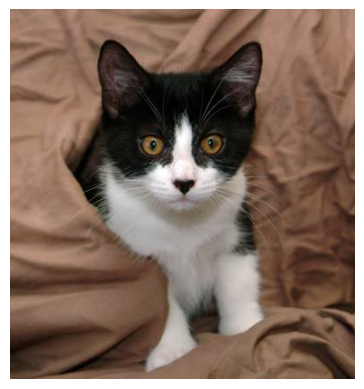

In [15]:
# Loading some of the images
# using cv2
cat_image = 'dog_cat/train/cats/cat.1002.jpg'
import cv2

img = cv2.imread(cat_image)
# print(img) --  this return array of image
#yaha pe image ki array return ho rahi hai isko app matplotlib se image ke ofrm me dekh sakte hai 

# see the img array
import matplotlib.pyplot as plt
# OpenCV loads images in BGR format, so convert to RGB for correct colors
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")  # hides axes
plt.show()

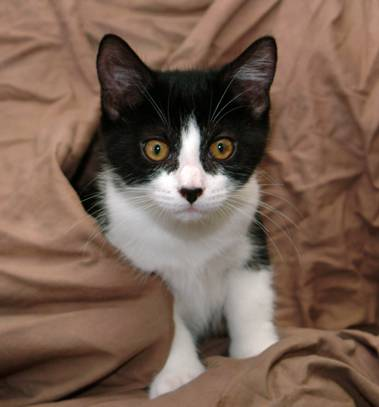

In [13]:
#using PIL
# Open as PIL Image
img1 = Image.open('dog_cat/train/cats/cat.1002.jpg')
# Show image (works only with PIL object)
img1

Array shape: (407, 379, 3)


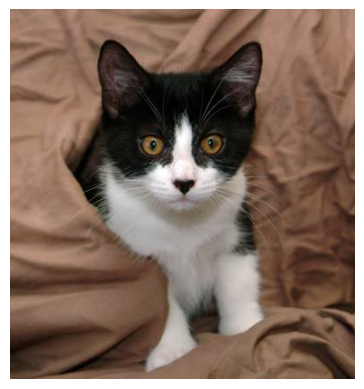

In [17]:
# Convert to NumPy array
img_array = np.array(img1)
# print(img_array) -- thsi also return array of image
print("Array shape:", img_array.shape)

# To display NumPy image, use matplotlib
import matplotlib.pyplot as plt
plt.imshow(img_array)
plt.axis("off")
plt.show()

Building the model

In [19]:
base_dir = 'dog_cat/train'
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
)

In [20]:
# using 20% of data  for validation
train_genrator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary',
    subset = 'training'
)

Found 16000 images belonging to 2 classes.


In [21]:
validation_genrator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary',
    subset = 'validation',
    shuffle = False
)

Found 4000 images belonging to 2 classes.


In [22]:
train_genrator.class_indices

{'cats': 0, 'dogs': 1}

In [23]:
model = models.Sequential([
    #Layer 1
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)),
    layers.MaxPooling2D((2,2)),

    #Layer 2
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    #Layer 3
    layers.Conv2D(128,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    #Layer 4
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(512,activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
])

model.summary()

C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 32)          │          36,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         803,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 933,985 (3.56 MB)

 Trainable params: 933,985 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [25]:
history = model.fit(train_genrator,
          epochs = 10,
          validation_data = validation_genrator)

C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 232s 288ms/step - accuracy: 0.5152 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 94s 118ms/step - accuracy: 0.5052 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 97s 121ms/step - accuracy: 0.4995 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 97s 121ms/step - accuracy: 0.5002 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 91s 113ms/step - accuracy: 0.5001 - loss: 0.6930 - val_accuracy: 0.5903 - val_loss: 0.6669
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 94s 117ms/step - accuracy: 0.5680 - loss: 0.6754 - val_accuracy: 0.6212 - val_loss: 0.6492
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 206s 257ms/step - accuracy: 0.6295 - loss: 0.6453 - val_accuracy: 0.4988 - val_loss: 0.6946
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 104s 130ms/step - accuracy: 0.5860 - loss

In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_dir = 'dog_cat/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),   # same as input size of model
    batch_size=20,
    class_mode='binary',
    shuffle=False
)

# Evaluate model
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Found 5000 images belonging to 2 classes.
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.7712 - loss: 0.5317
Test Loss: 0.45352235436439514
Test Accuracy: 0.7978000044822693


In [27]:
probabilities = model.predict(test_generator)
probabilities

250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step


array([[0.0938664 ],
       [0.10663898],
       [0.27998006],
       ...,
       [0.95542276],
       [0.83221585],
       [0.3919286 ]], dtype=float32)

In [28]:
predicted_classes = (probabilities > 0.5).astype(int).squeeze()
predicted_classes

test_generator.class_indices
{'cats': 0, 'dogs': 1}

class_labels = list(test_generator.class_indices.keys())
predicted_labels = [class_labels[i] for i in predicted_classes]

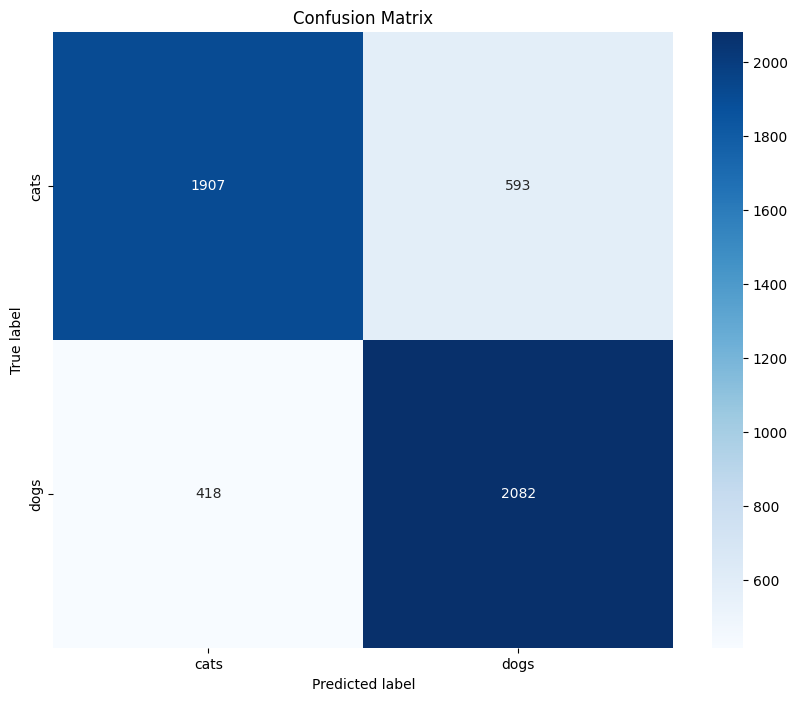

In [34]:
# Get the true labels from the test generator
true_classes = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [35]:
def make_prediction(image_path):
    img = load_img(image_path, target_size=(150, 150))  # load image
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0   # normalize

    prediction = model.predict(img_array)
    print("Prediction:", prediction)

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Prediction
    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction: [[0.10663895]]


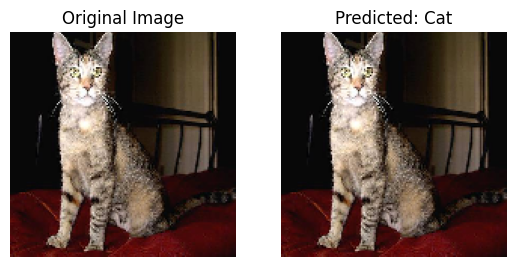

In [37]:
make_prediction('dog_cat/test/cats/cat.10000.jpg')
